In [1]:
#importing libraries

import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


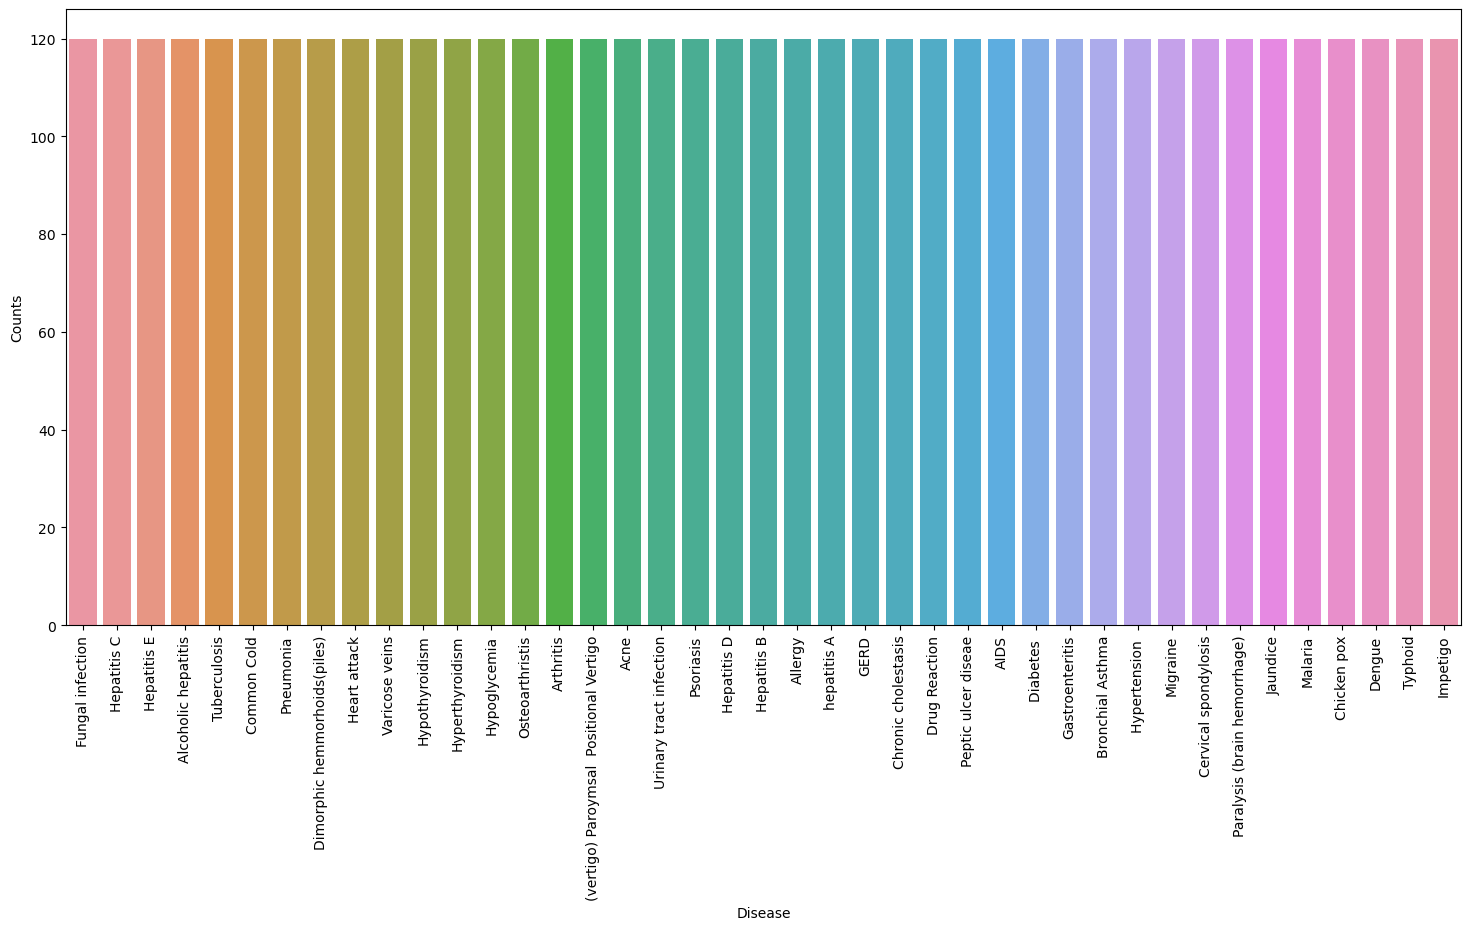

In [2]:
# Reading the train.csv by removing the last column since it's an empty column

DATA_PATH = 'C:/Users/40108321/Documents/New Project (Personal)/Projects/1/Datasets/Training.csv'
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not

disease_counts = data['prognosis'].value_counts()
temp_df = pd.DataFrame({
    "Disease" : disease_counts.index,
    "Counts" : disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation = 90)
plt.show()

From the above plot, we can see that dataset is balanced (there are exactly 120 samples for each disease) 
and no further balancing is required

Next step is to convert the prognosis column (which is currently of object datatype) to numerical datatype
This is done by label encoder

In [3]:
# Encoding the target value into numerical value using LabelEncoder

encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

Now that we have a cleaned our dataset by removing NAs & encoding, it is time to split the dataset to train and test our models
Split will be 80:20 :: train:test

In [5]:
X = data.iloc[:,:-1] #selects all rows and (all columns except the last one)
Y = data.iloc[:, -1] #selects all rows and last column

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 24)

print(f'Train: {X_train.shape}, {Y_train.shape}')
print(f'Test: {X_test.shape}, {Y_test.shape}')

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


Stage: Model Building

To evaluate the ML models, we will use K-Fold cross-validation (Split the data across k-folds and in each iteration; choose one fold for validation and train rest of the folds. Do this for all the folds and find the average accuracy to evaluate the model

For cross-validation, we will use Support Vector Classifier, Gaussian Naive Bayes Classifier, and Random Forest Classifier


In [6]:
# Using K-fold Cross-validation for model selection

# defining scoring metric for k-fold cross-validation

def cv_scoring(estimator, X, Y):
    return accuracy_score(Y, estimator.predict(X))

# Initializing Models
models = {
    "SVC" : SVC(),
    "Gaussian NB" : GaussianNB(),
    "Random Forest" : RandomForestClassifier(random_state = 18)
}

# Producing cross-validation score for the models

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0


Building robust classifier by combining all models:

Accuracy on training data by SVM classifier: 100.0
Accuracy on test data by SVM classifier: 100.0


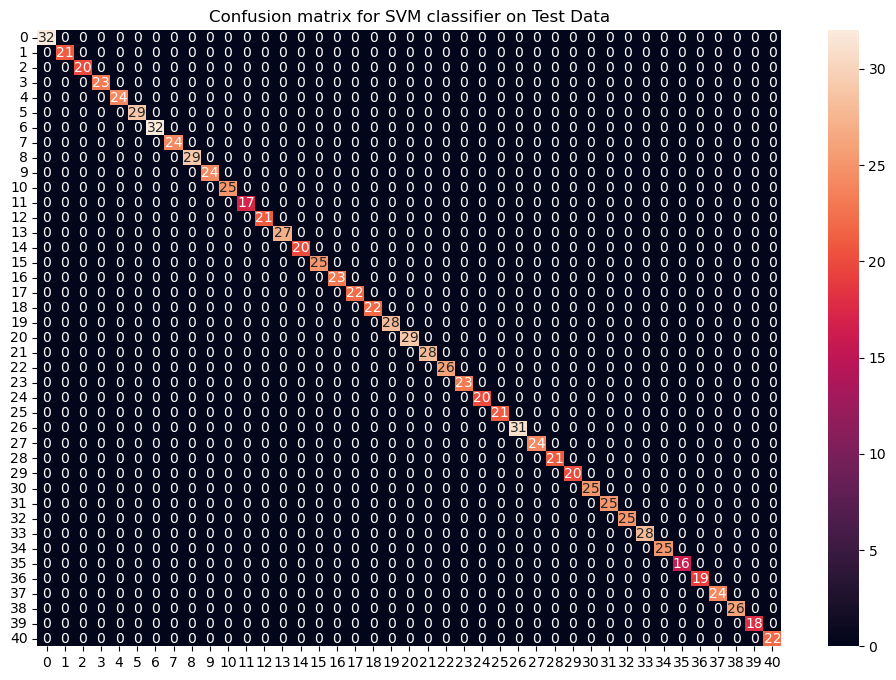

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


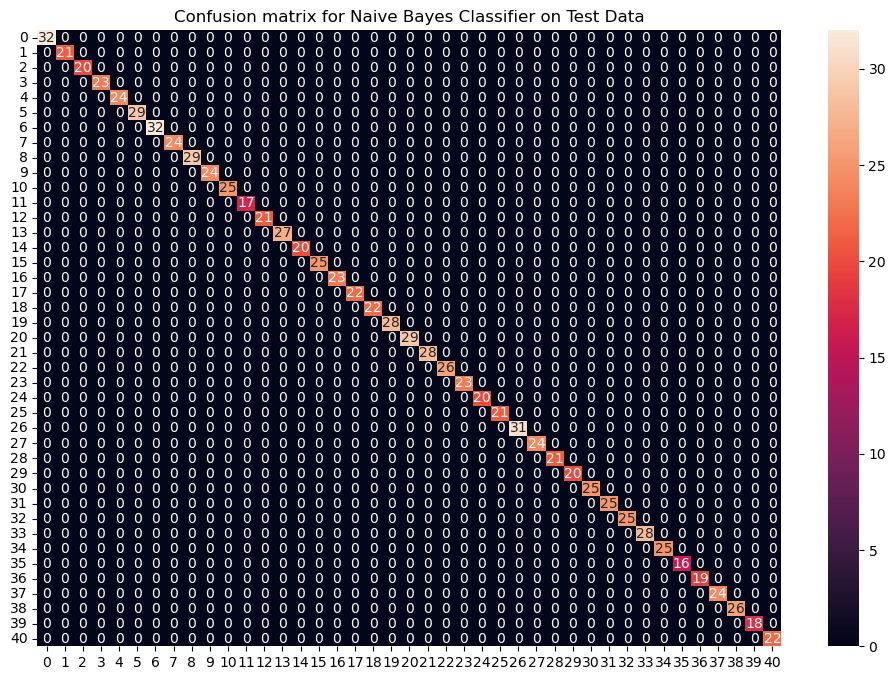

Accuracy on train data for Random Forest Classifier: 100.0
Accuracy on test data for Random Forest Classifier: 100.0


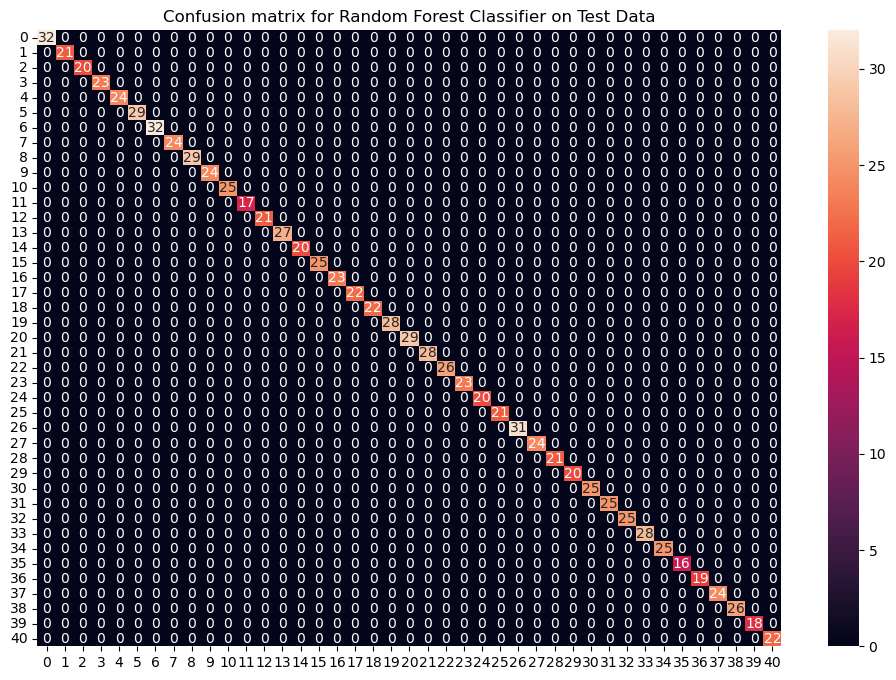

In [11]:
# Training and testing SVM classifier
svm_model = SVC()
svm_model.fit(X_train, Y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on training data by SVM classifier\
: {accuracy_score(Y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM classifier\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion matrix for SVM classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(Y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(Y_test, preds)*100}")
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state = 18)
rf_model.fit(X_train, Y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data for Random Forest Classifier\
: {accuracy_score(Y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data for Random Forest Classifier\
: {accuracy_score(Y_test, preds)*100}")
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion matrix for Random Forest Classifier on Test Data")
plt.show()



From the above plots, we can see that our models are performing very well on the unseen data.

Now, let's train the models on the whole train data present in the dataset & then test our combined model on test data present in the dataset

Accuracy on Test dataset by the combined model: 100.0


C:\Users\40108321\AppData\Local\Temp\ipykernel_30440\932795575.py:26: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]


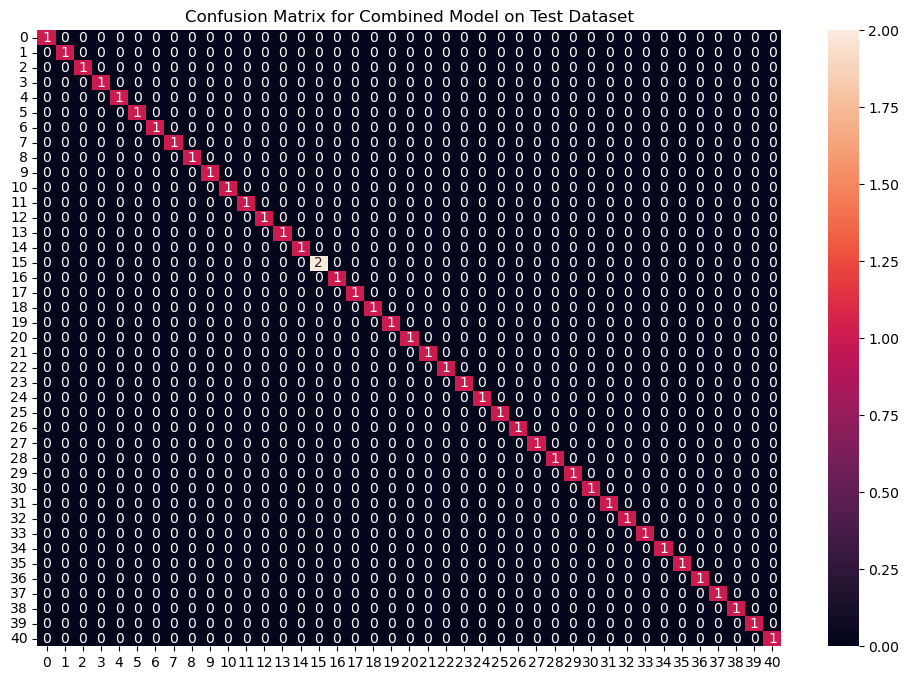

In [12]:
# Training the models on whole data

final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state = 18)
final_svm_model.fit(X, Y)
final_nb_model.fit(X, Y)
final_rf_model.fit(X, Y)

#reading the test data

test_data = pd.read_csv("C:/Users/40108321/Documents/New Project (Personal)/Projects/1/Datasets/Testing.csv").dropna(axis = 1)

test_X = test_data.iloc[:,:-1]
test_Y = encoder.transform(test_data.iloc[:,-1])

# Making predictions by taking mode of predictions made by all the classifiers

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

!pip install scipy
from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize = (12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

We can see that our combined model has classified all the data points accurately.

Now, we can create a function that takes symptoms separated by commas as input and predicts the disease using this combined model

In [30]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the input symptoms into numerical form

symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index" : symptom_index,
    "predictions_classes" : encoder.classes_
}


# Defining the function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models

def predictDisease(symptoms):
    symptoms = symptoms.split(',')
    
    # creating input data for the models
    input_data = [0] * len(data_dict['symptom_index'])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it into a suitable format for model prediction
    input_data = np.array(input_data).reshape(1,-1)
    
    # Generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final predictions by taking mode of all predictions
    # Using statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction" : rf_prediction,
        "naive_bayes_prediction" : nb_prediction,
        "svm_model_prediction" : svm_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection'}


C:\Users\40108321\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\40108321\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\40108321\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
